In [55]:
import nltk
import os 
import collections
from nltk.corpus import stopwords
import matplotlib as plt
nltk.download("punkt")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\egzin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [8]:
print(os.getcwd())

D:\pythonProjects\txtForNlp\quran


In [9]:
with open (r"quran.txt") as f:
    text = f.read()


In [10]:
from nltk.tokenize import word_tokenize

In [14]:
words = word_tokenize(text.lower())

In [18]:
words[10:20]
stop_words = set(stopwords.words('english'))  

In [23]:
words =[w for w in words if w.isalpha()]
words[1:20]

['the',
 'name',
 'of',
 'god',
 'the',
 'gracious',
 'the',
 'merciful',
 'be',
 'to',
 'god',
 'lord',
 'of',
 'the',
 'universes',
 'most',
 'gracious',
 'the',
 'most']

In [19]:
words_sans_stop = [w for w in words if w not in stop_words]

In [27]:
words_sans_stop[1:5]
from collections import Counter

In [28]:
counter_words = Counter(words_sans_stop)

In [52]:
counter_words.most_common(10)


[('god', 2216),
 ('lord', 847),
 ('people', 562),
 ('day', 440),
 ('us', 407),
 ('say', 400),
 ('earth', 382),
 ('believe', 379),
 ('among', 348),
 ('upon', 346)]

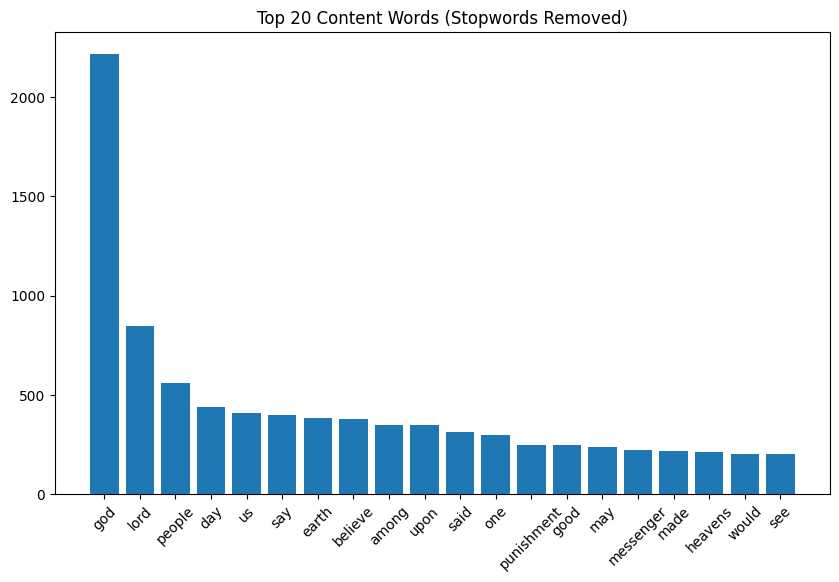

In [58]:

stop_words = set(stopwords.words("english"))

filtered_counts = [(w, c) for w, c in counter_words.most_common(200) if w.lower() not in stop_words]
words, freqs = zip(*filtered_counts[:20])

plt.figure(figsize=(10,6))
plt.bar(words, freqs)
plt.xticks(rotation=45)
plt.title("Top 20 Content Words (Stopwords Removed)")
plt.show()

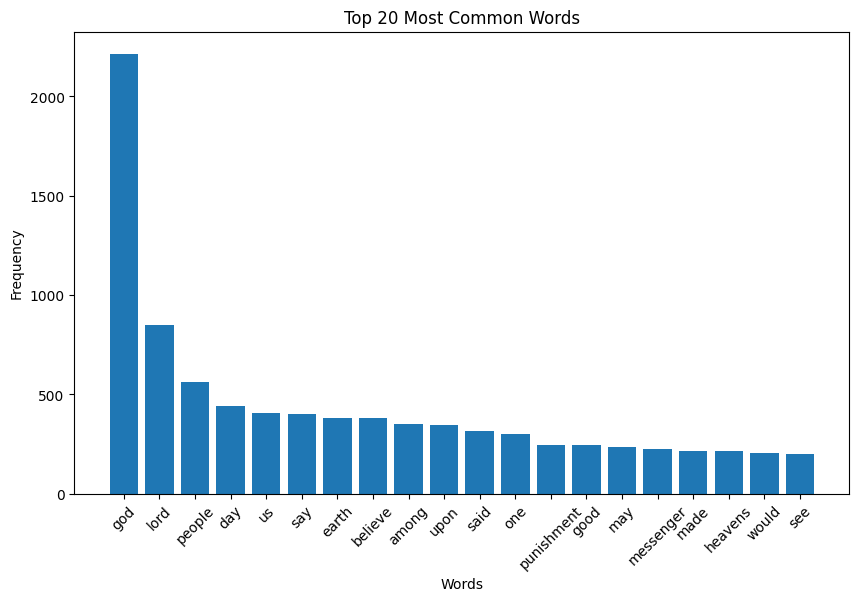

In [57]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.bar(words, freqs)
plt.xticks(rotation=45)
plt.title("Top 20 Most Common Words")
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.show()

In [72]:
# Open Quran text
with open("quran.txt", "r", encoding="utf-8") as f:
    quran_text = f.read()

# Open Bible text (your file looked like akjv.txt)
with open("akjv.txt", "r", encoding="utf-8") as f:
    bible_text = f.read()


In [73]:
import nltk
from collections import Counter
from nltk.corpus import stopwords
import re

# Simple tokenizer (split on non-letters)
def tokenize(text):
    return re.findall(r"\b[a-zA-Z']+\b", text.lower())

quran_tokens = tokenize(quran_text)
bible_tokens = tokenize(bible_text)

quran_counts = Counter(quran_tokens)
bible_counts = Counter(bible_tokens)


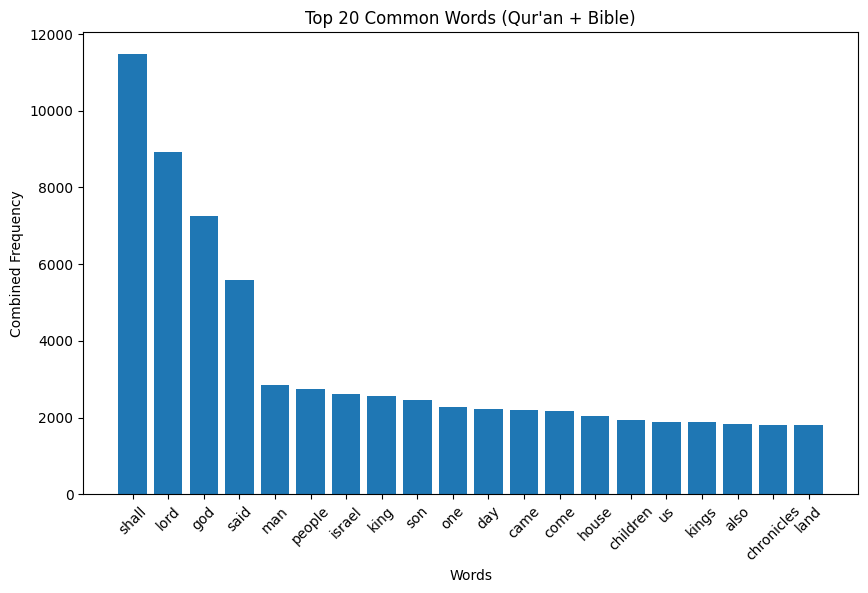

In [74]:
from collections import Counter
from nltk.corpus import stopwords

# assume you already have two Counters: quran_counts, bible_counts
stop_words = set(stopwords.words("english"))

# filter stopwords
quran_filtered = {w:c for w,c in quran_counts.items() if w.lower() not in stop_words}
bible_filtered = {w:c for w,c in bible_counts.items() if w.lower() not in stop_words}

# find intersection words
common_words = set(quran_filtered) & set(bible_filtered)

# sum frequencies from both
common_freqs = [(w, quran_filtered[w] + bible_filtered[w]) for w in common_words]

# top 20 by combined frequency
top20_common = sorted(common_freqs, key=lambda x: x[1], reverse=True)[:20]

# unpack
words, freqs = zip(*top20_common)

# plot
plt.figure(figsize=(10,6))
plt.bar(words, freqs)
plt.xticks(rotation=45)
plt.title("Top 20 Common Words (Qur'an + Bible)")
plt.xlabel("Words")
plt.ylabel("Combined Frequency")
plt.show()


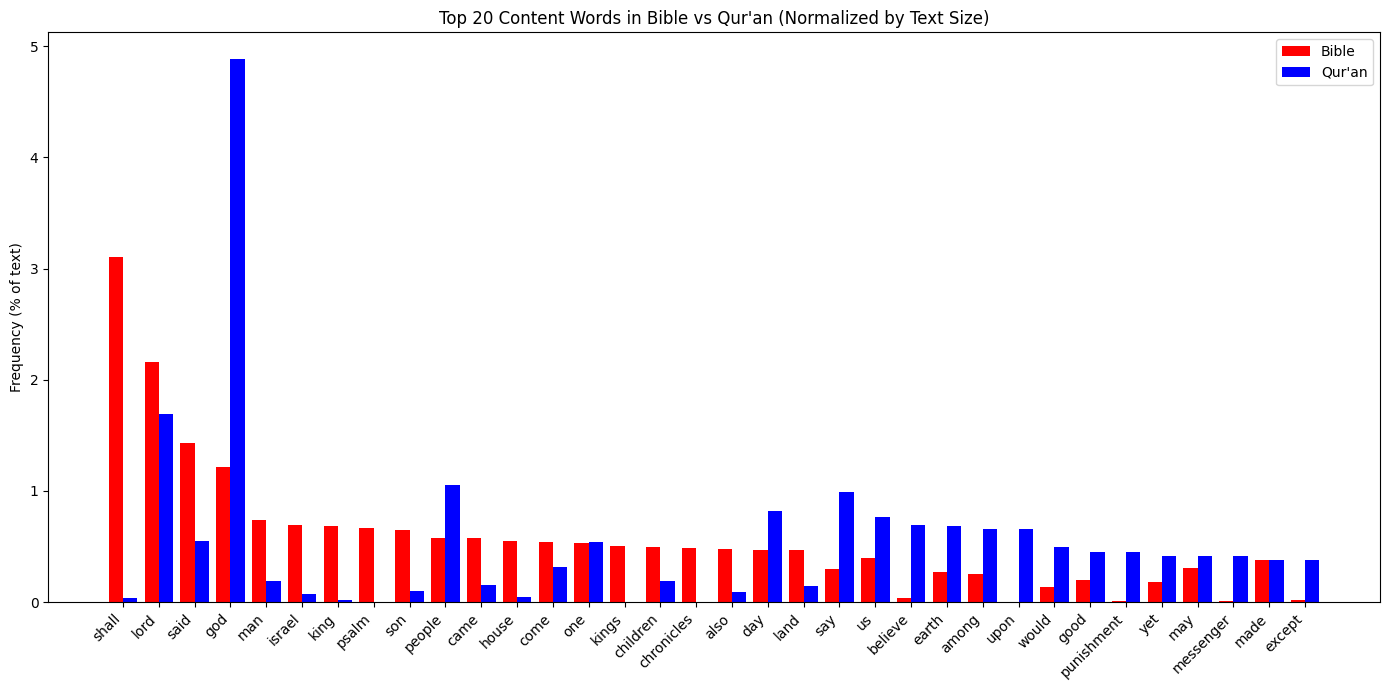

In [79]:
# total token counts (excluding stopwords)
bible_total = sum(bible_filtered.values())
quran_total = sum(quran_filtered.values())

# Top 20 each (still absolute but we'll convert to percentages)
bible_top20 = sorted(bible_filtered.items(), key=lambda x: x[1], reverse=True)[:20]
quran_top20 = sorted(quran_filtered.items(), key=lambda x: x[1], reverse=True)[:20]

# Union of top words
all_words = [w for w,_ in bible_top20] + [w for w,_ in quran_top20]
unique_words = list(dict.fromkeys(all_words))

# Normalize to percentages
bible_vals = [(bible_filtered.get(w, 0) / bible_total) * 100 for w in unique_words]
quran_vals = [(quran_filtered.get(w, 0) / quran_total) * 100 for w in unique_words]

# Plot side-by-side
x = np.arange(len(unique_words))
width = 0.4

plt.figure(figsize=(14,7))
plt.bar(x - width/2, bible_vals, width, label="Bible", color="red")
plt.bar(x + width/2, quran_vals, width, label="Qur'an", color="blue")

plt.xticks(x, unique_words, rotation=45, ha="right")
plt.ylabel("Frequency (% of text)")
plt.title("Top 20 Content Words in Bible vs Qur'an (Normalized by Text Size)")
plt.legend()
plt.tight_layout()
plt.savefig("figs/bible_vs_quran_top20_normalized.png", dpi=200, bbox_inches="tight")
plt.show()



In [78]:
import os
os.makedirs("figs", exist_ok=True)

# example names — use these for your two main charts
plt.savefig("figs/bible_vs_quran_top20_raw.png", dpi=200, bbox_inches="tight")

# for the normalized, stopword-removed grouped bars:
plt.savefig("figs/bible_vs_quran_top20_normalized.png", dpi=200, bbox_inches="tight")


<Figure size 640x480 with 0 Axes>